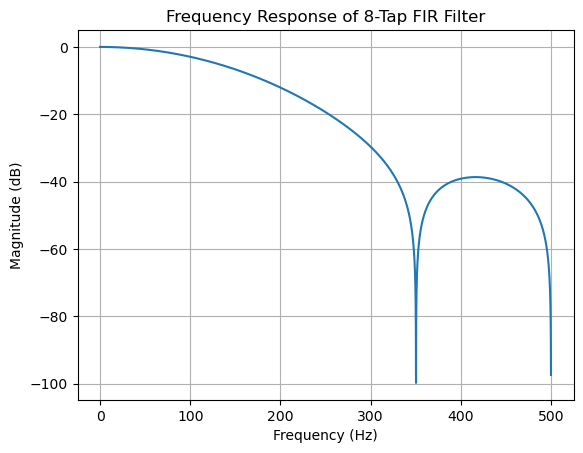

FIR Filter Coefficients: [0.00875474 0.04794887 0.16402439 0.27927199 0.27927199 0.16402439
 0.04794887 0.00875474]


In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# FIR filter specifications
num_taps = 8  
fs = 1000      # Sampling frequency (Hz)
fc = 100       # Cutoff frequency (Hz)
nyquist = fs / 2
normalized_cutoff = fc / nyquist

# Design FIR filter using Hamming window
coeffs = signal.firwin(num_taps, normalized_cutoff, window="hamming")

# Plot frequency response
w, h = signal.freqz(coeffs, worN=8000)
plt.plot(w / np.pi * nyquist, 20 * np.log10(abs(h)))
plt.title("Frequency Response of 8-Tap FIR Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

print("FIR Filter Coefficients:", coeffs)

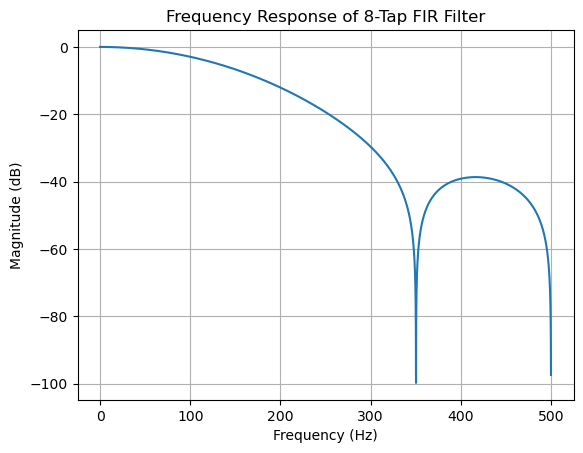

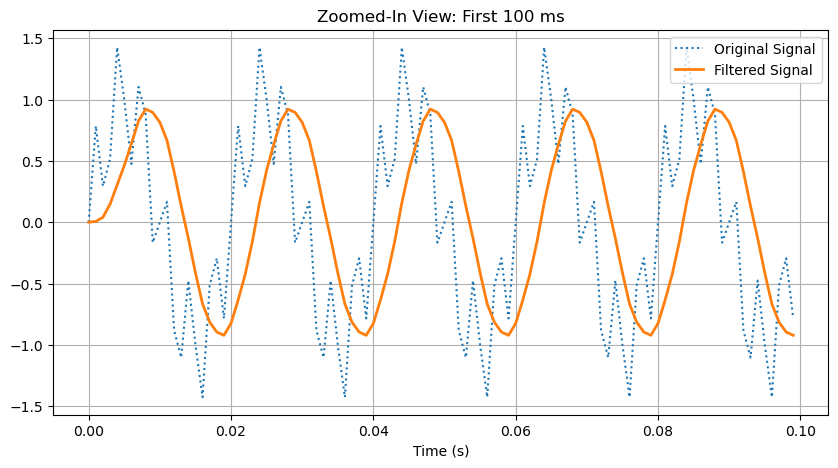

In [17]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Filter specifications
num_taps = 8  # 8-tap FIR filter
fs = 1000      # Sampling frequency in Hz
fc = 100       # Cutoff frequency in Hz
nyquist = fs / 2
normalized_cutoff = fc / nyquist

# Design the FIR filter; save coefficients to a file
coeffs = signal.firwin(num_taps, normalized_cutoff, window="hamming")
np.savetxt("fir_coeffs.txt", coeffs, fmt="%.6f")

# Generate and plot frequency response
w, h = signal.freqz(coeffs, worN=8000)
plt.figure()
plt.plot(w / np.pi * nyquist, 20 * np.log10(abs(h)))
plt.title("Frequency Response of 8-Tap FIR Filter")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.show()

# Generate test signal (50 Hz + 300 Hz); save to file
t = np.arange(0, 1, 1/fs)  # 1 second duration
x = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 300 * t)  # Input signal
np.savetxt("input_signal.txt", x, fmt="%.6f")

# Apply FIR filter
y = signal.lfilter(coeffs, 1.0, x)

# Zoomed-in plot (first 100 ms)
plt.figure(figsize=(10, 5))
zoom_range = t < 0.1  # First 100 ms
plt.plot(t[zoom_range], x[zoom_range], label="Original Signal", linestyle="dotted")
plt.plot(t[zoom_range], y[zoom_range], label="Filtered Signal", linewidth=2)
plt.title("Zoomed-In View: First 100 ms")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()

plt.show()

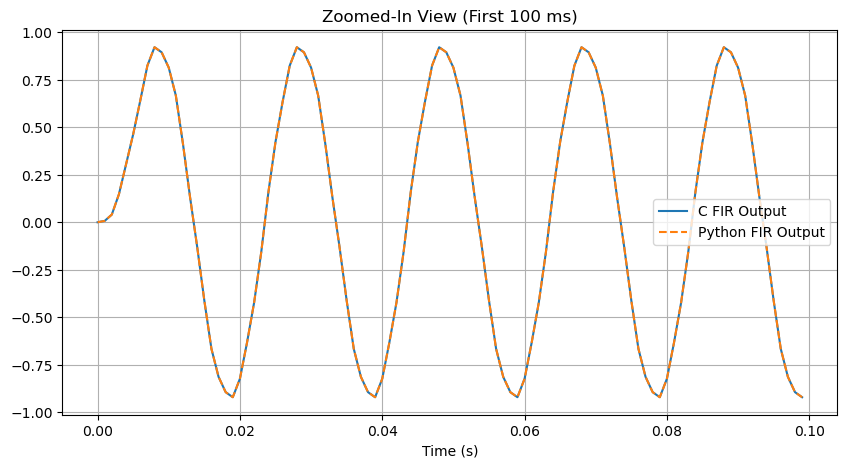

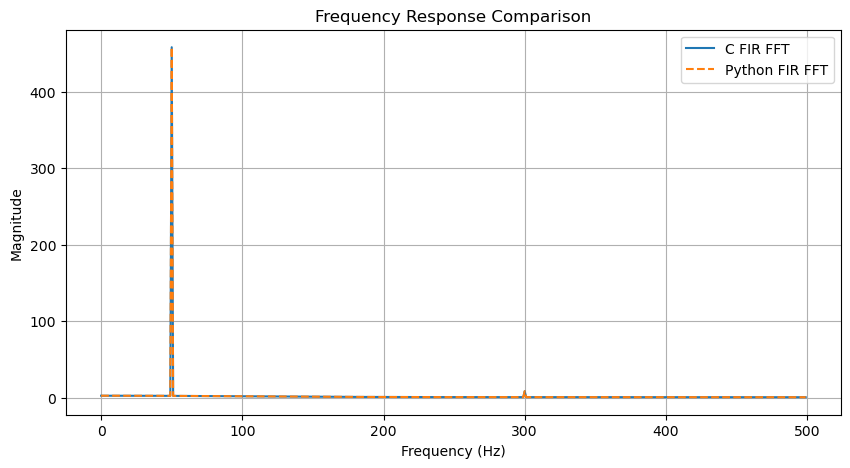

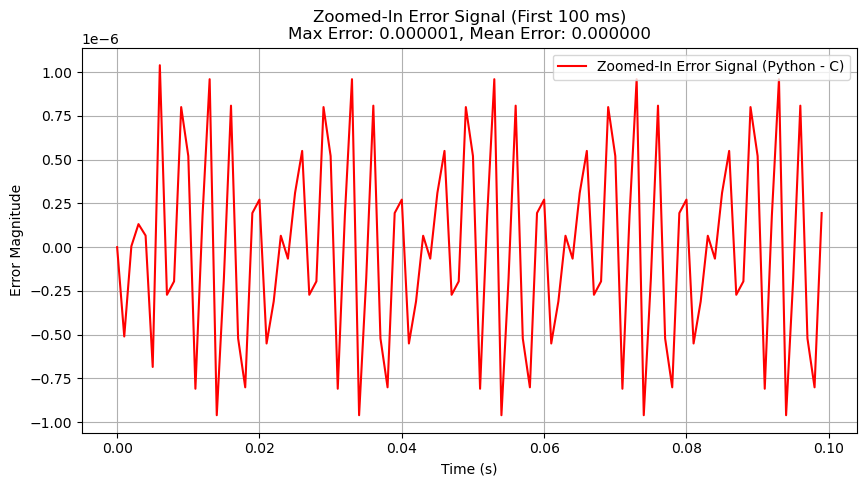

Max Error: 0.000001
Mean Error: 0.000000


In [16]:
# Load C output data from "output_signal.txt"
try:
    c_data = np.loadtxt("output_signal.txt")  # Expecting two columns: input and filtered output
    c_input = c_data[:, 0]   # First column: Original input signal from C
    c_output = c_data[:, 1]  # Second column: C FIR filtered output
except Exception as e:
    print(f"Error loading 'output_signal.txt': {e}")
    exit()

# Apply FIR filter in Python
python_output = signal.lfilter(coeffs, 1.0, c_input)

# Compute error between Python and C implementations
error_signal = python_output - c_output
max_error = np.max(np.abs(error_signal))
mean_error = np.mean(np.abs(error_signal))

# Time vector
t = np.arange(0, len(c_input)) / fs

# Plot zoomed-in comparison (first 100 ms)
plt.figure(figsize=(10, 5))
zoom_range = t < 0.1
plt.plot(t[zoom_range], c_output[zoom_range], label="C FIR Output")
plt.plot(t[zoom_range], python_output[zoom_range], label="Python FIR Output", linestyle="dashed")
plt.title("Zoomed-In View (First 100 ms)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid()

# Compute and plot frequency responses
fft_c_output = np.fft.fft(c_output)
fft_python_output = np.fft.fft(python_output)
freqs = np.fft.fftfreq(len(c_input), 1/fs)

plt.figure(figsize=(10, 5))
plt.plot(freqs[:fs//2], np.abs(fft_c_output[:fs//2]), label="C FIR FFT")
plt.plot(freqs[:fs//2], np.abs(fft_python_output[:fs//2]), linestyle="dashed", label="Python FIR FFT")
plt.title("Frequency Response Comparison")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid()

# Plot zoomed-in error signal (first 100 ms)
plt.figure(figsize=(10, 5))
plt.plot(t[zoom_range], error_signal[zoom_range], label="Zoomed-In Error Signal (Python - C)", color='r')
plt.title(f"Zoomed-In Error Signal (First 100 ms)\nMax Error: {max_error:.6f}, Mean Error: {mean_error:.6f}")
plt.xlabel("Time (s)")
plt.ylabel("Error Magnitude")
plt.legend()
plt.grid()

plt.show()

# Print error summary
print(f"Max Error: {max_error:.6f}")
print(f"Mean Error: {mean_error:.6f}")
